# Introduction into Analytical Thinking & Plotting

## Analysis on the `tips` survey dataset

We will start this analysis trying to understand:
> **What are predictors for the amount of cash a dining table will tip in a restaurant?**



For this we will be using a very famous dataset: the `tips` survey. The Tips dataset is a small dataset so the entire csv file can be read into python in one go without causing any problems. 

The dataset has the following fields.
- `total_bill` which is the total amount spent at the restaurant
- `tip` which is the tip left on top of the bill
- `sex` of the customer
- `smoker` if the customers were smokers (Yes), or not (No)
- `day` of the week when the meal took place
- `time` of the day it happened
- `size` which is the number of people at the table

Source: https://rdrr.io/cran/reshape2/man/tips.html -> available at: https://github.com/mwaskom/seaborn-data

In [2]:
import pandas as pd               # https://pandas.pydata.org/ (data analysis & data manipulation)
import numpy as np                # https://numpy.org/ (mathematical functions)
import matplotlib.pyplot as plt   # https://matplotlib.org/ (creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy)
import seaborn as sns             # https://seaborn.pydata.org/index.html (provides a high-level interface for drawing attractive and informative statistical graphics)

In [3]:
# load tips dataset
tips = sns.load_dataset("tips")
# check if the dataframe looks ok
print("The first five rows in the dataset:  \n", tips.head(), "\n\n")
print("The last five rows in the dataset:  \n", tips.tail())

The first five rows in the dataset:  
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 


The last five rows in the dataset:  
      total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [4]:
# the tips dataset has 244 rows and 7 columns
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# the data type attributes for each column in the tips dataset
print(tips.dtypes) 

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


### Exploring the `tips` dataset visually

In [6]:
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid.
sns.set(style="darkgrid")

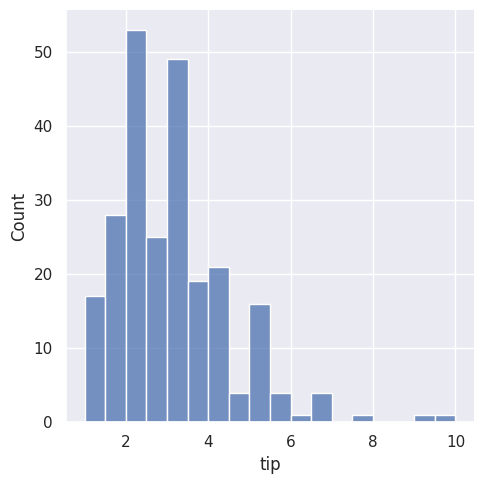

In [7]:
# distribution of the tip amount and its frquency
# -> around twenty tables have tipped a bit more than 4$
sns.displot(x=tips.tip)

### Plotting the correlation between total_bill and tip: Do we see any pattern in the data?

<Axes: xlabel='total_bill', ylabel='tip'>

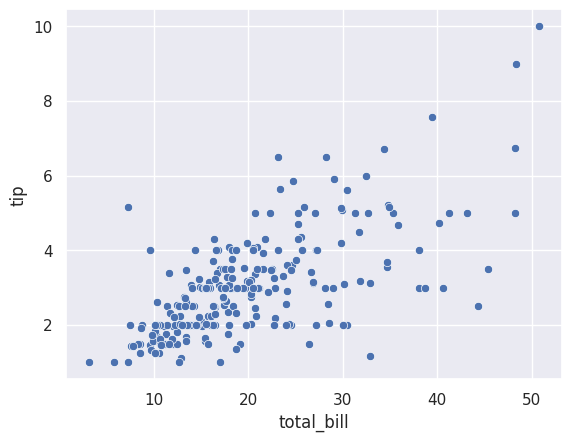

In [8]:
sns.scatterplot(
    x=tips.total_bill,
    y=tips.tip
)

**YES!** There seems to be a positive linear correlation between the amount people spent at the restaurant and the amunt they tip! 

-> There is a positive linear correlation when the variable on the x -axis increases as the variable on the y -axis increases. This is shown by an upwards sloping straight regression line.

## Recall from the lecture...what plots are available for what problem?

Think about what you want to *model*

* Change over time
* Comparison
* Part of a whole
* A Correlation
* Ranking
* Distribution
* Flows and relationships
* Geospatial

###**Analytical thinking exercise:**
- What are  questions that would be interessting to answer on the tips dataset?
- How would you model this question?

#### Examplary solutions: 
* Do smokers tip more than non smokers? > Comparison
* Is the size of the group impacting the tipping? > correlation
* Is there more tips on Sunday VS saturday ? > Comparison, change over time if we had the true
* Distribution of proportion of tip VS the total amount > distribution


## Comparison and Correlation plots with Seaborn

We could compare how much money was spent given the day of the week or the time of the time for example.

### **Comparison example: Barplot with Seaborn**
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

https://seaborn.pydata.org/generated/seaborn.barplot.html

<Axes: xlabel='day', ylabel='tip'>

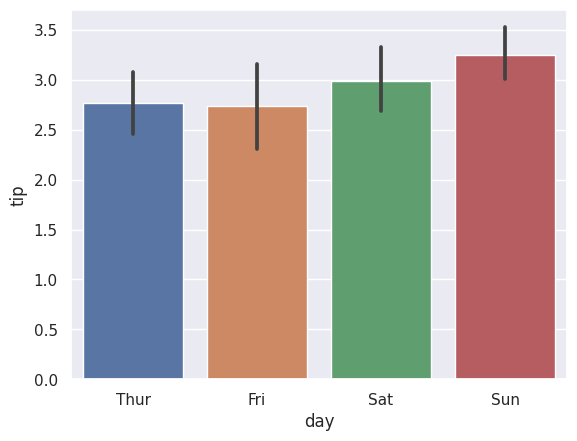

In [21]:
sns.barplot(x='day',
            y='tip',
            data=tips)

In [14]:
# No visualization, but using pandas groupby function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
tips.groupby(['day','sex'])['total_bill'].mean()

day   sex   
Thur  Male      18.714667
      Female    16.715312
Fri   Male      19.857000
      Female    14.145556
Sat   Male      20.802542
      Female    19.680357
Sun   Male      21.887241
      Female    19.872222
Name: total_bill, dtype: float64

### **Correlation example: Scatter plots with Seaborn**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot

We could ask ourselves is there a correlation between the price of the meal and the tip?

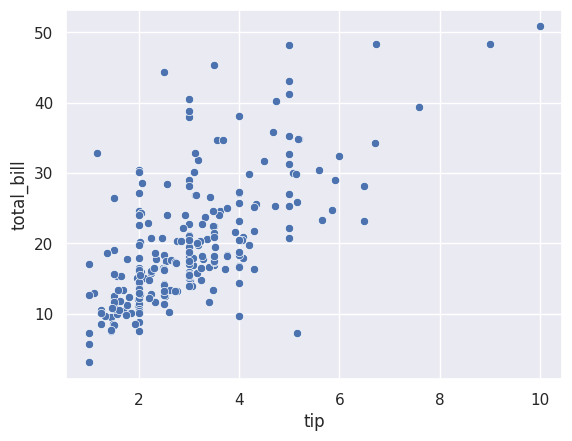

In [15]:
sns.scatterplot(x='tip', 
                y='total_bill', 
                data=tips);

<Axes: xlabel='tip', ylabel='total_bill'>

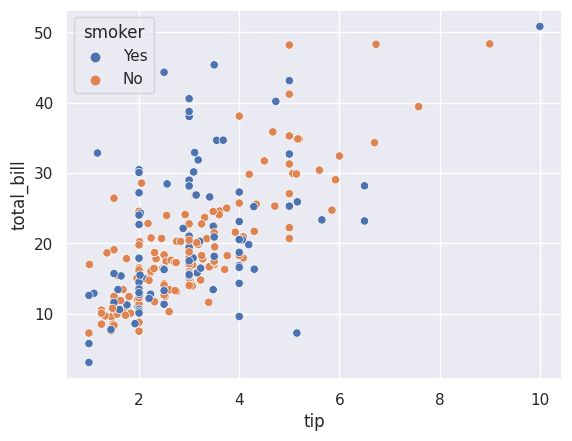

In [16]:
sns.scatterplot(x='tip', 
                y='total_bill', 
                hue='smoker', # Here the females and males will be plotted in different colors
                data=tips)

# hue > Grouping variable that will produce points with different colors.

In [17]:
# we can store the average as a new column in our dataframe
tips['tipping_rate'] = tips.tip / tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tipping_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<Axes: xlabel='tipping_rate', ylabel='smoker'>

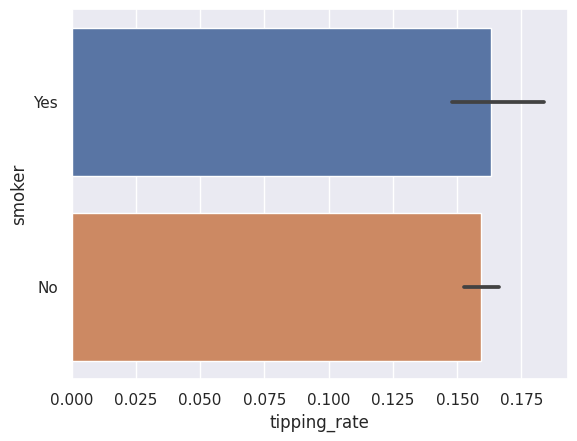

In [18]:
sns.barplot(x='tipping_rate',
                y='smoker', # Here the females and males will be plotted in different colors
                data=tips)

### **Exercise**

*   Plot a graph comparing the `tip` given the `time` of the day. What do you understand from this graph?
*   Plot a relationship graph between the number of person of the table `size` and the `total_bill`




<Axes: xlabel='time', ylabel='tip'>

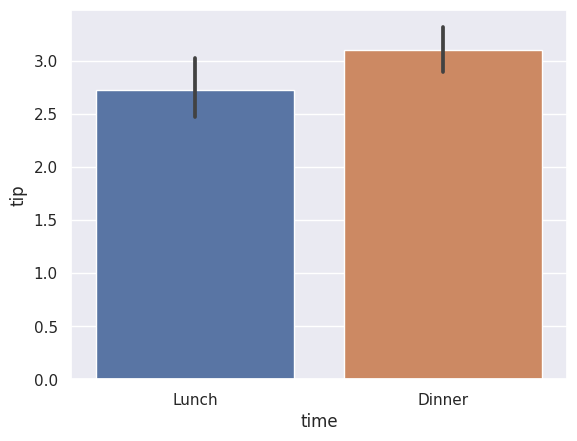

In [19]:
sns.barplot(x='time',
            y='tip',
            data=tips)

<Axes: xlabel='size', ylabel='total_bill'>

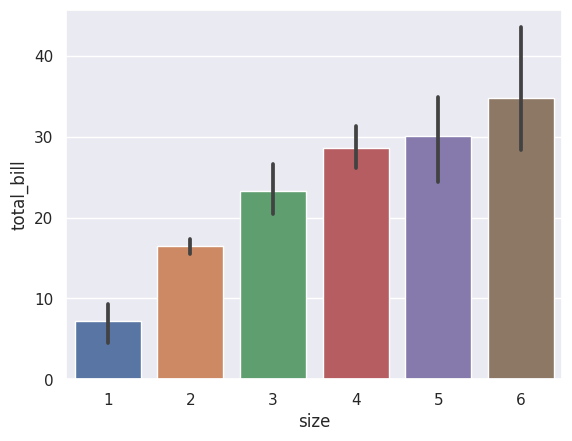

In [20]:
sns.barplot(x='size',
                y='total_bill',
                data=tips)

### **Distribution example: Boxplot with Seaborn**

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*8noddM5HrclQmqUU9U_dUw.png)


#### Median
The **median** is the value that separates the higher half of a data from the lower half. It’s calculated by the following steps: order your values, and find the middle one. 
For example, if we have the numbers 1, 3, 4, **7**, 8, 8, 9, the median will be 7.


#### First quartile
The first quartile is the median of the data values to the left of the median in our ordered values.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the first quartile will be ?

#### Third quartile
The third quartile is the median of the data values to the right of the median in our ordered values.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the Third quartile will be ?

#### Interquartile Range(IQR)
The IQR approximates the amount of spread in the middle 50% of the data. The formula is the third quartile - the first quartile.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the IQR will be ?


#### Outlier
An outlier is a data value that lies outside the overall pattern. A commonly used rule says that a value is an outlier if it’s less than the first quartile - 1.5 * IQR or high than the third quartile + 1.5 * IQR.

#### Maximum and Minimum
The minimum and the maximum are just the min and max values from our data. (outliers are not included)


<Axes: xlabel='tip'>

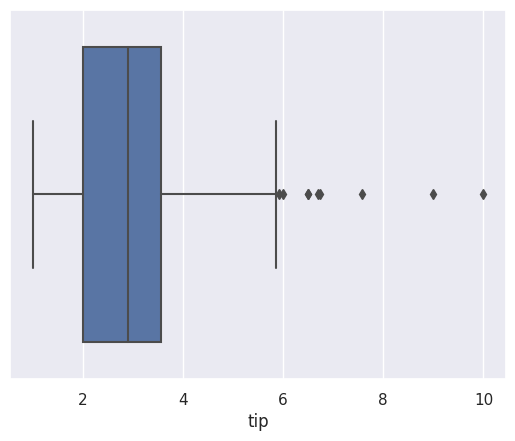

In [22]:
sns.boxplot(x='tip',
            data = tips)

<Axes: xlabel='tip', ylabel='sex'>

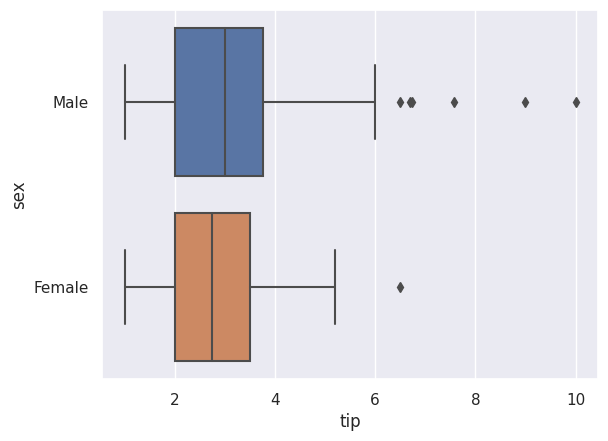

In [23]:
sns.boxplot(x='tip',
            y='sex', # Adding y here works as hue
            #hue='smoker', # You can add also another hue to have an even more granular comparison
            data = tips)

### **Distribution example: Histogram with Seaborn**

https://seaborn.pydata.org/tutorial/distributions.html

It is similar to a bar chart, but a histogram groups numbers into ranges.

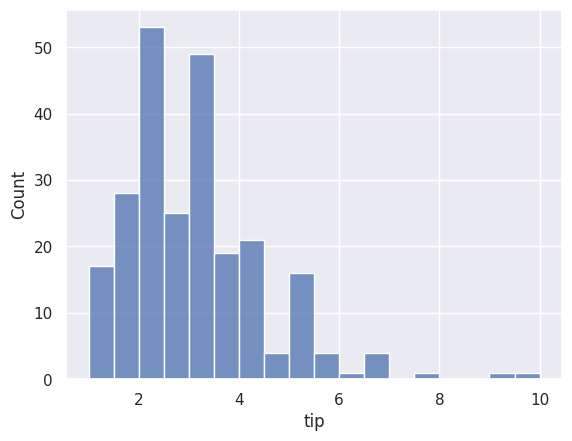

In [25]:
sns.histplot(tips['tip']);

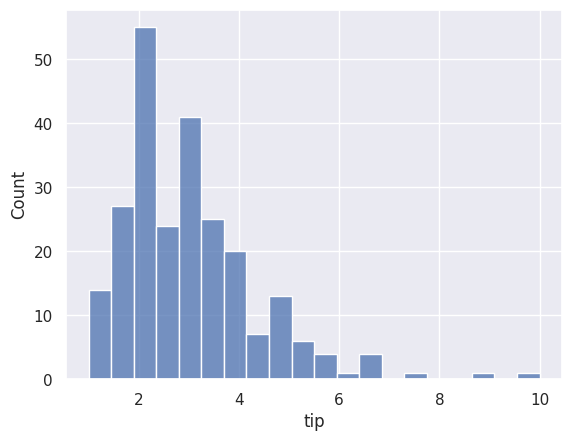

In [27]:
sns.histplot(tips['tip'], 
             bins=20,
             kde = False
             );

## Additional sources
- https://www.angela1c.com/projects/tips-project-files/part1/